# Object detection with model zoo model

In this tutorial, you learn how to use a built-in model zoo model (SSD) to achieve an [object detection](https://en.wikipedia.org/wiki/Object_detection) task.

## Preparation

In [1]:
%dependency /add ai.djl:api:0.22.1
%dependency /add ai.djl.mxnet:mxnet-engine:0.22.1
%dependency /add ai.djl.mxnet:mxnet-model-zoo:0.22.1
%dependency /add org.slf4j:slf4j-simple:1.7.32
%dependency /resolve

Adding dependency ai.djl:api:0.22.1
Adding dependency ai.djl.mxnet:mxnet-engine:0.22.1
Adding dependency ai.djl.mxnet:mxnet-model-zoo:0.22.1
Adding dependency org.slf4j:slf4j-simple:1.7.32
Solving dependencies
Resolved artifacts count: 8
Add to classpath: /home/ANT.AMAZON.COM/tutuianu/.local/share/jupyter/kernels/rapaio-jupyter-kernel/mima_cache/ai/djl/api/0.22.1/api-0.22.1.jar
Add to classpath: /home/ANT.AMAZON.COM/tutuianu/.local/share/jupyter/kernels/rapaio-jupyter-kernel/mima_cache/com/google/code/gson/gson/2.10.1/gson-2.10.1.jar
Add to classpath: /home/ANT.AMAZON.COM/tutuianu/.local/share/jupyter/kernels/rapaio-jupyter-kernel/mima_cache/net/java/dev/jna/jna/5.13.0/jna-5.13.0.jar
Add to classpath: /home/ANT.AMAZON.COM/tutuianu/.local/share/jupyter/kernels/rapaio-jupyter-kernel/mima_cache/org/apache/commons/commons-compress/1.22/commons-compress-1.22.jar
Add to classpath: /home/ANT.AMAZON.COM/tutuianu/.local/share/jupyter/kernels/rapaio-jupyter-kernel/mima_cache/org/slf4j/slf4j-api/

In [2]:
import ai.djl.modality.cv.*;
import ai.djl.modality.cv.output.*;
import ai.djl.modality.cv.util.*;
import ai.djl.mxnet.zoo.*;
import ai.djl.repository.zoo.*;
import ai.djl.training.util.*;

## Step 1: Load image

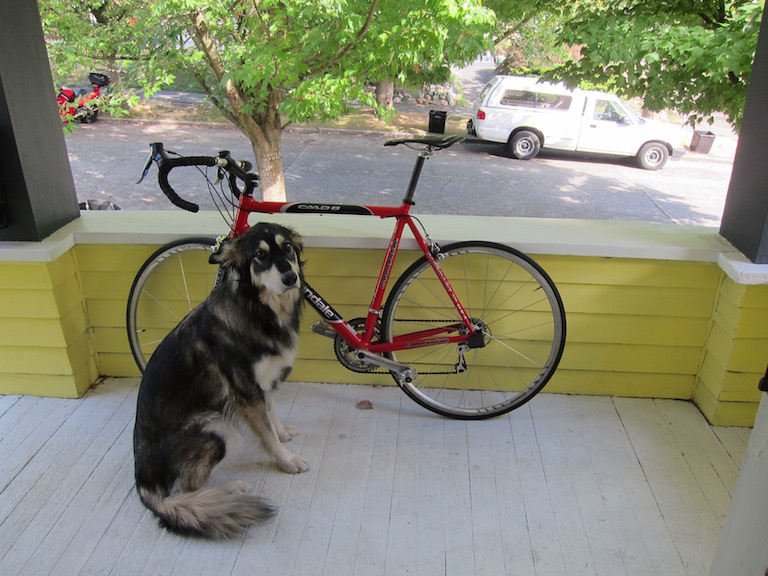

In [3]:
var img = ImageFactory.getInstance().fromUrl("https://resources.djl.ai/images/dog_bike_car.jpg");
img.getWrappedImage()

## Step 2: Load model zoo model

In this example, you load a SSD (Single Shot MultiBox Detector) model from the MXNet model zoo. For more information about model zoo, see the [Model Zoo Documentation](https://github.com/deepjavalibrary/djl/blob/master/docs/model-zoo.md)

In [4]:
var criteria = Criteria.builder()
    .setTypes(Image.class, DetectedObjects.class)
    .optArtifactId("ssd")
    .optProgress(new ProgressBar())
    .build();
var model = criteria.loadModel();

Loading:     100% |████████████████████████████████████████|


## Step 3: Create Predictor and detect an object in the image

In [5]:
var detections = model.newPredictor().predict(img);

detections

[
	{"class": "car", "probability": 0.99991, "bounds": {"x"=0.611, "y"=0.137, "width"=0.293, "height"=0.160}}
	{"class": "bicycle", "probability": 0.95385, "bounds": {"x"=0.162, "y"=0.207, "width"=0.594, "height"=0.588}}
	{"class": "dog", "probability": 0.93752, "bounds": {"x"=0.168, "y"=0.350, "width"=0.274, "height"=0.593}}
]

## Check detected result

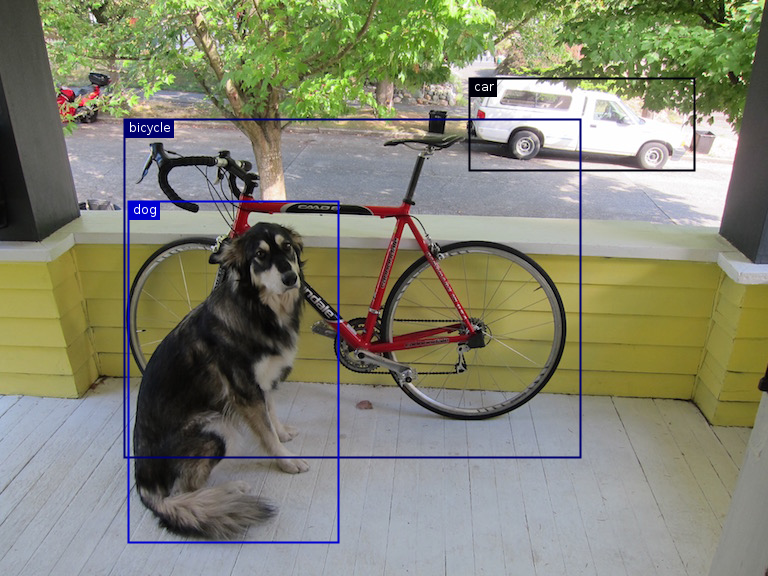

In [6]:
img.drawBoundingBoxes(detections);
img.getWrappedImage()

## Summary

Using the model zoo model provided, you can run inference with just the following lines of code:

In [7]:
var img = ImageFactory.getInstance().fromUrl("https://resources.djl.ai/images/dog_bike_car.jpg");
var criteria = Criteria.builder()
    .setTypes(Image.class, DetectedObjects.class)
    .optArtifactId("ssd")
    .build();
var model = criteria.loadModel();
var detections = model.newPredictor().predict(img);

In [8]:
detections

[
	{"class": "car", "probability": 0.99991, "bounds": {"x"=0.611, "y"=0.137, "width"=0.293, "height"=0.160}}
	{"class": "bicycle", "probability": 0.95385, "bounds": {"x"=0.162, "y"=0.207, "width"=0.594, "height"=0.588}}
	{"class": "dog", "probability": 0.93752, "bounds": {"x"=0.168, "y"=0.350, "width"=0.274, "height"=0.593}}
]